# A New Approach to Telecommunications Network Design Automated and Data Driven

![alt text](img/biarri_networks_logo_1_line_solo.jpg)

<a href="http://biarrinetworks.com">biarrnetworks.com</a>

fabion.kauker@biarri.com

### Background

   * What is Telecommunications network design?  
   * Is there demand for it?  
   * What technologies are used?  


## What is Telecommunications network design?

A model used to describe networking specifics is called the <a href="https://en.wikipedia.org/wiki/OSI_model">Open Systems Interconnection model (OSI model)</a>.

But we are interested in the physical layer. (The cables and devices that get placed on your street, house and properties owned/leased by the service provider.)

Fixed line design for access networks. (Many other parts to the network including wireless front/back haul, metro and backbone)

In industry this is called Outside Plant (OSP) engineering.


Many technologies which are used today

* Fibre Optics -  Gigabit Passive Optical Networks (GPON)
* Copper - Asymmetric digital subscriber line (ADSL)
* Coax - Data Over Cable Service Interface Specification (DOCSIS)

**Focus on Fibre Optics - GPON**

## So what are the things that need designing and placement?

![alt-text](img/IMG_3440.jpg)


<table><tr><td><img src='img/IMG_3482.jpg'></td><td><img src='img/IMG_3483.jpg'></td></tr></table>


<a href="http://www.youtube.com/watch?feature=player_embedded&v=LAZecpnZbz8
" target="_blank"><img src="http://img.youtube.com/vi/LAZecpnZbz8/0.jpg" 
alt="IMAGE ALT TEXT HERE" width="800" height="600" border="10" /></a>

## Demand

* Demand for bandwidth growing
* Current technologies do not deliver the bandwidth demanded by customers
* expensive to maintain legacy assets
* BUT it is expensive to roll out fibre




![alt-text](img/figure_6.jpg)
Source - https://www.akamai.com/us/en/about/news/press/2017-press/akamai-releases-first-quarter-2017-state-of-the-internet-connectivity-report.jsp

## Technolgies used to create designs

* Pencil and paper
* AutoCAD
* Expert knowledge manual process
![alt-text](img/construction_print.jpg)


### Knowledge Branches

   * Domain Knowledge  
   * Graphs & Geometry  
   * Geographic Information Systms (GIS)  
   * Mixed Integer Programs (MIPs)  

## Domain Knowledge

In [1]:

from IPython.core.display import HTML
HTML("""<table>
    <tr>
       <td>
       <ul>
       <li><font size="6">How can we create some software to solve the network design problem?</font></li>
       <br>
       <li><font size="6">Define the structure of the problem</font></li>
       <br>
       <li><font size="6">Define how network components/items relate and connect to one another</font></li>
       </ul>
       </td>
    <td>
       <img src='img/n tier network design.jpg'></td>
    </tr>
</table>

<style>
    ul{  display:inline;text-align:left}
</style>
""")



How can we create some software to solve the network design problem? Define the structure of the problem Define how network components/items relate and connect to one another,


In [2]:
%matplotlib inline
import networkx as nx

G = nx.Graph()
G.add_nodes_from([
    (1, {'demand': 3}),(2, {'demand': 1}), (3, {'demand': 0}),
    (4, {'demand': 0}), (5, {'demand': 1})
])

G.add_edges_from([
    [1, 2, {'distance': 123}],
    [3, 5, {'distance': 456}],
    [2, 5, {'distance': 789}]
])


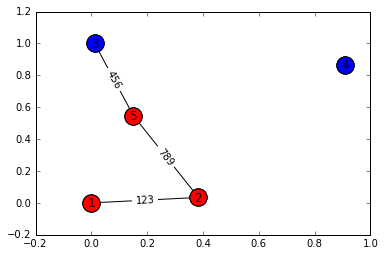

In [3]:
layout = nx.spring_layout(G)
s_layout = layout.copy()
nx.draw_networkx_labels(G, pos=layout)
nx.draw_networkx_nodes(
    G,
    pos=layout,
    nodelist=[n for (n, d) in G.nodes(data=True) if d['demand'] > 0],
    node_color='r'
)
nx.draw_networkx_nodes(
    G,
    pos=layout,
    nodelist=[n for (n, d) in G.nodes(data=True) if d['demand'] == 0],
    node_color='b'
)
nx.draw_networkx_edges(G,pos=layout)
nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=dict([((u,v,),d['distance'])
             for u,v,d in G.edges(data=True)]))
nx.draw_networkx_nodes(G, pos=layout, nodelist=[n for (n, d) in G.nodes(data=True) if d['demand'] > 0], node_color='r')
nx.draw_networkx_nodes(G, pos=layout, nodelist=[n for (n, d) in G.nodes(data=True) if d['demand'] == 0], node_color='b')

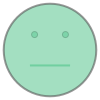

In [4]:
from shapely.geometry import Point, LineString, Polygon
from shapely.geometry.collection import GeometryCollection

pt_1 = Point((3.5,6))
pt_2 = Point((5.5,6))
circle = Point((4.5, 5)).buffer(3)
line = LineString([(3.2, 4), (5.8, 4)])
my_collection = GeometryCollection([pt_1, pt_2, circle, line])
my_collection

## Now lets combine these concepts with GIS

  building                                           geometry  highway  \
0           LINESTRING (-122.0264209 36.9621622, -122.0265...  service   
1           LINESTRING (-122.0353757 36.9637905, -122.0349...  service   
2           LINESTRING (-122.0370658 36.9625155, -122.0381...  service   
3           LINESTRING (-122.0362772 36.9632798, -122.0353...  service   
4           LINESTRING (-122.0300962 36.9662833, -122.0301...  service   

         id                    name  
0  10547675                          
1  10547712  Sewage Treatment Plant  
2  10547816                          
3  10548122              Alley 2590  
4  10548596                          


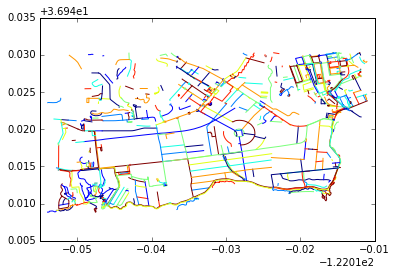

In [5]:
import geopandas as gpd

street_df = gpd.read_file('santa_cruz_osm_lines.shp')
print(street_df.head())
street_df.plot()
del(street_df)

In [1]:
%matplotlib inline
import networkx as nx
road_graph = nx.read_shp('santa_cruz_osm_lines.shp')
road_graph.edges(data=True)[:1]

[((-122.0242688, 36.9694787),
  (-122.0238184, 36.9695263),
  {'Json': '{ "type": "LineString", "coordinates": [ [ -122.0242688, 36.9694787 ], [ -122.0239422, 36.9695112 ], [ -122.0238184, 36.9695263 ] ] }',
   'ShpName': 'santa_cruz_osm_lines',
   'Wkb': b'\x00\x00\x00\x00\x02\x00\x00\x00\x03\xc0^\x81\x8d\x9e\xb9\x94\x0b@B|\x17\xe0\xc7U\x95\xc0^\x81\x88D\xdd\x7f\xa2@B|\x18\xf1h\x8d\x88\xc0^\x81\x86=\x9cB\xc1@B|\x19p\x13\x8eR',
   'Wkt': 'LINESTRING (-122.0242688 36.9694787,-122.0239422 36.9695112,-122.0238184 36.9695263)',
   'building': None,
   'highway': 'service',
   'id': 270761355,
   'name': None})]

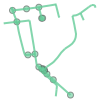

In [2]:
from shapely.wkt import loads
from shapely.geometry import Point, LineString, Polygon
from shapely.geometry.collection import GeometryCollection

connected_graph = list(nx.connected_component_subgraphs(road_graph.to_undirected()))
shortest_path_nodes = nx.shortest_path(
    connected_graph[6],
    connected_graph[6].nodes()[0],
    connected_graph[6].nodes()[4]
    )

points = [Point(c) for c in shortest_path_nodes]
lines = [loads(l['Wkt']) for _, _, l in connected_graph[6].edges(data=True)]
collection = GeometryCollection(points + lines)
collection

## MIPS  

Paper roll cutting stock problem
---
Where the problem is defined by an example taken from [wikipedia](http://en.wikipedia.org/wiki/Cutting_stock_problem)


$min \sum\limits_{i=1}^n c_{i}x_{j} \\
s.t. \sum\limits_{i=1}^n a_{ij}x_{i} >= q_{j} \quad \forall j = 1,...,m \\
x_{i} >= 0, \; integer$

Using libraries the following shows the interaction between
* Python
* Pulp
* Pandas
* Matplotlib

In [3]:
import os
from collections import namedtuple
from itertools import combinations_with_replacement
import pulp
import pandas as pd
import pandas.core.frame as frame
import pandas.core.series as series

In [45]:
SOLVER = pulp.solvers.GLPK()
def solve(F):
    solver = SOLVER
    result = solver.solve(F.model)
    if pulp.LpStatus[result] == 'Optimal':
        return F.model.variablesDict

In [77]:
def recover_solution(F, output_dir):
    '''
    TODO
    '''
    epsilon = 1.e-6

    solution_items = []
    values = []

    variable_prefix = 'vX_'
    
    logfile = os.path.join(output_dir, 'solution_variables.csv')

    with open(logfile, mode='w+') as outfile:
        outfile.write('Variable,Value')
        
        ## extract solution variables
        solution_variables = {}

        for name in F.model.variables():
            solution_variables[name] = name.value()

        for name in solution_variables.keys():
            value = solution_variables[name]
            name = str(name)
            
                
            if name[:3] == variable_prefix:
                if value <= epsilon: continue
                outfile.write('%s,%i' % (name, value))
                
                index = int(name[len(variable_prefix):])
                data_item = index
                values.append(value)

                solution_items.append(data_item)

    return solution_items, values


In [21]:
# create helper functions
def make_bin_var(name):
    return pulp.LpVariable(name, lowBound=0, upBound=1, cat="Integer")

def make_cont_var(name):
    return pulp.LpVariable(name, lowBound=0, upBound=1)

def make_bin_non_zero(name):
    return pulp.LpVariable(name, lowBound=-1e30, cat="Integer")

def make_cont_var_pos(name):
    return pulp.LpVariable(name, lowBound=0)

def make_cont_int_pos(name):
    return pulp.LpVariable(name, lowBound=0, cat="Integer")

In [22]:
class Formulation:
    def __init__(self, combos, orders, output_dir):
        self.model = pulp.LpProblem("model", pulp.LpMinimize)

        self.combos = combos
        self.sum_wid = combos.sum_wid
        self.waste = combos.waste
        self.orders = orders
        
        # logging output file
        # TODO: write this out somewhere nice
        log_name = os.path.join(output_dir,'debug.csv')
        
        print("creating variables")
        
        self.create_variables()
        
        print("Constructing objective")
        self.objective()

        print("Constructing first constraint")
        self.constraint1()

    def create_variables(self):
        # initialise variables
        self.X = {} #a variable for usage of each combination
        
        cVariables = 0
        for i in self.orders.index:
            for j in self.combos.index:
                self.X[j] = make_cont_int_pos("vX_%d" % (j))
            cVariables += 1

    def objective(self):

        a_cost = pulp.LpAffineExpression(((self.X[j], self.waste[j])
            for j in self.combos.index))
        obj = 0
        obj += a_cost

        self.model += obj

    def constraint1(self):
        c_01 = 0
        for i, (width, rolls) in self.orders.iterrows():
            lhs = pulp.LpAffineExpression((self.X[j], list(c).count(width))
            for j, c in enumerate(self.combos.combination, 1))
 
            rhs = rolls

            self.model += (lhs >= rhs)
            c_01 = i
            
        print("Constraints 1: {}".format(c_01))


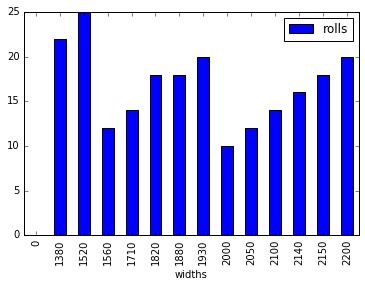

In [23]:
import pandas.core.frame as frame

base_roll_width = 5600
widths = [
          0, 1380, 1520, 1560, 1710, 1820, 1880,
          1930, 2000, 2050, 2100, 2140, 2150, 2200, ]
rolls = [0, 22, 25, 12, 14, 18, 18, 20, 10, 12, 14, 16, 18, 20, ]
orders = frame.DataFrame.from_items(([('widths', widths), ('rolls', rolls)]))
orders.plot(x='widths', y='rolls', kind='bar');

In [24]:
from collections import namedtuple
from itertools import combinations_with_replacement

def find_min_combo(min_width, max_width):
    '''
    find the combination of the smallest cut that meets the max width
    >>> assert find_min_combo(50, 150) == 3
    '''
    i = 0
    total_width = min_width
    while total_width <= max_width:
        i += 1
        total_width += min_width
    return i


def create_combinations(max_width, widths):
    '''
    create all the valid ways of cutting given the widths of the roll
    '''
    max_combo = find_min_combo(min(widths[1:]), max_width)
    cut_combinations = []
    sum_wid = []
    wastage = []

    for combination in combinations_with_replacement(widths, max_combo):
        total_wid = sum(combination)
        if total_wid < max_width:
            cut_combinations.append(combination)
            sum_wid.append(total_wid)
            wastage.append(max_width - total_wid)
    
    cut_combinations_frame = frame.DataFrame.from_items(([
        ('combination', [combo for combo in cut_combinations]),
        ('sum_wid', [s_l for s_l in sum_wid]),
        ('waste', [waste for waste in wastage]),]))
    
    return cut_combinations_frame
    

In [25]:
combos = create_combinations(base_roll_width, widths)
combos[:10]

,combination,sum_wid,waste
0,"(0, 0, 0, 0)",0,5600
1,"(0, 0, 0, 1380)",1380,4220
2,"(0, 0, 0, 1520)",1520,4080
3,"(0, 0, 0, 1560)",1560,4040
4,"(0, 0, 0, 1710)",1710,3890
5,"(0, 0, 0, 1820)",1820,3780
6,"(0, 0, 0, 1880)",1880,3720
7,"(0, 0, 0, 1930)",1930,3670
8,"(0, 0, 0, 2000)",2000,3600
9,"(0, 0, 0, 2050)",2050,3550


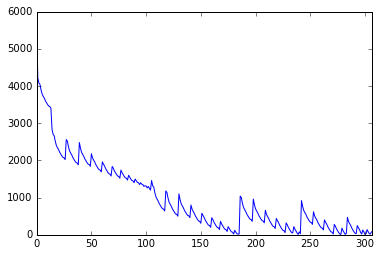

In [26]:
combos.waste.plot()

In [27]:
F = Formulation(combos[1:], orders[1:], '')

creating variables
Constructing objective
Constructing first constraint
Constraints 1: 13


In [81]:
solve(F)
combo_cols, values = recover_solution(F, '')
solution_df = combos.loc[combo_cols]
solution_df['total'] = series.Series(values, index=solution_df.index)
solution_df

,combination,sum_wid,waste,total
180,"(0, 1380, 2000, 2200)",5580,20,15
271,"(0, 1560, 1820, 2200)",5580,20,5
300,"(0, 1710, 1880, 2000)",5590,10,1
278,"(0, 1560, 1880, 2150)",5590,10,18
297,"(0, 1710, 1820, 2050)",5580,20,13
239,"(0, 1520, 1930, 2140)",5590,10,25
185,"(0, 1380, 2100, 2100)",5580,20,7


In [82]:
# lower bound
sum(orders.widths * orders.rolls) / 5600

72.707142857142856

In [83]:
# % waste
solution_df.waste.values.sum() / (solution_df.total.values.sum() * base_roll_width) * 100

0.023384353741496597

In [84]:
solution_df.total.values

array([15,  5,  1, 18, 13, 25,  7])